## 21.2 Theory

In [1]:
demo.data <- data.frame(y=c(1.55,0.42,1.29,0.73,0.76,-1.09,1.41,-0.32),
                        x1=c(1.13,-0.73,0.12,0.52,-0.54,-1.15,0.20,-1.09),
                        x2=c(1,0,1,1,0,1,0,1))
demo.data

y,x1,x2
1.55,1.13,1
0.42,-0.73,0
1.29,0.12,1
0.73,0.52,1
0.76,-0.54,0
-1.09,-1.15,1
1.41,0.20,0
-0.32,-1.09,1


To get your point estimates in $$ β = [β0, β1, β2]^{⊤} $$ for the linear model,
you first have to construct X and Y as required by (21.3).

In [5]:
Y <- matrix(demo.data$y)
Y
n <- nrow(demo.data)


1.55
0.42
1.29
0.73
0.76
-1.09
1.41
-0.32


In [6]:
X <- matrix(c(rep(1,n),demo.data$x1,demo.data$x2),nrow=n,ncol=3)
X

1,1.13,1
1,-0.73,0
1,0.12,1
1,0.52,1
1,-0.54,0
1,-1.15,1
1,0.20,0
1,-1.09,1


## 21.3 Implementing in R and Interpreting
                

### 21.3.1 Additional Predictors


In [14]:
demo.fit <- lm(y~x1+x2,data=demo.data)
demo.fit


Call:
lm(formula = y ~ x1 + x2, data = demo.data)

Coefficients:
(Intercept)           x1           x2  
      1.225        1.015       -0.698  


In [16]:
library(MASS)
survmult <- lm(Height~Wr.Hnd+Sex,data=survey)
survmult


Call:
lm(formula = Height ~ Wr.Hnd + Sex, data = survey)

Coefficients:
(Intercept)       Wr.Hnd      SexMale  
    137.687        1.594        9.490  


In [17]:
 summary(survmult)


Call:
lm(formula = Height ~ Wr.Hnd + Sex, data = survey)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7479  -4.1830   0.7749   4.6665  21.9253 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 137.6870     5.7131  24.100  < 2e-16 ***
Wr.Hnd        1.5944     0.3229   4.937 1.64e-06 ***
SexMale       9.4898     1.2287   7.724 5.00e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.987 on 204 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.5062,	Adjusted R-squared:  0.5014 
F-statistic: 104.6 on 2 and 204 DF,  p-value: < 2.2e-16


In [18]:
survmult2 <- lm(Height~Wr.Hnd+Sex+Smoke,data=survey)
 summary(survmult2)


Call:
lm(formula = Height ~ Wr.Hnd + Sex + Smoke, data = survey)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.4869  -4.7617   0.7604   4.3691  22.1237 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 137.4056     6.5444  20.996  < 2e-16 ***
Wr.Hnd        1.6042     0.3301   4.860 2.36e-06 ***
SexMale       9.3979     1.2452   7.547 1.51e-12 ***
SmokeNever   -0.0442     2.3135  -0.019    0.985    
SmokeOccas    1.5267     2.8694   0.532    0.595    
SmokeRegul    0.9211     2.9290   0.314    0.753    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.023 on 201 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.5085,	Adjusted R-squared:  0.4962 
F-statistic: 41.59 on 5 and 201 DF,  p-value: < 2.2e-16


### 21.3.2 Interpreting Marginal Effects

### 21.3.3 Visualizing the Multiple Linear Model


In [19]:
survcoefs <- coef(survmult)
survcoefs

(Intercept)      Wr.Hnd     SexMale 
 137.686951    1.594446    9.489814

Here’s the equation for male students: <br>
“Mean height” = (137.687 + 9.4898) + 1.594 × “handspan” = 147.177 + 1.594 × “handspan”

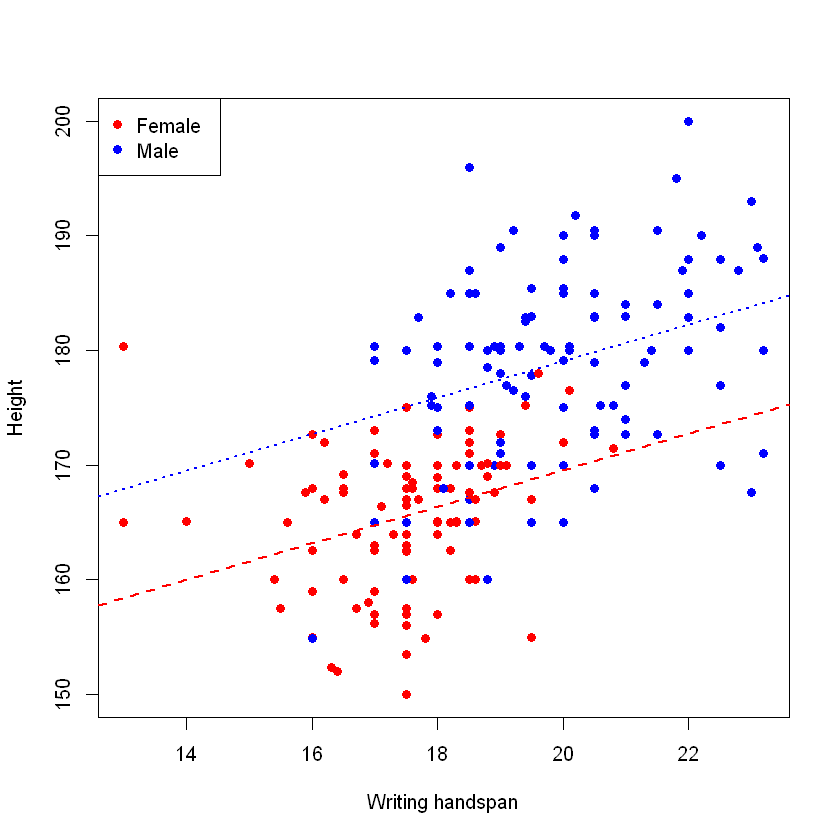

In [31]:
#First, a scatterplot of the height and handspan observations, split by sex, is drawn. 
plot(survey$Height~survey$Wr.Hnd, col=c("red","blue")[as.numeric(survey$Sex)], pch=16,xlab="Writing handspan",ylab="Height")

#Then, abline adds the line corresponding to females and adds a second one corresponding to males, based on those two equations.
abline(a=survcoefs[1],b=survcoefs[2],col="red",lwd=2, lty = 2)
abline(a=survcoefs[1]+survcoefs[3],b=survcoefs[2],col="blue",lwd=2, lty = 3)

legend("topleft",legend=levels(survey$Sex),col=c("red","blue"),pch=16)

### 21.3.4 Finding Confidence Intervals


In [32]:
confint(survmult2)

,2.5 %,97.5 %
(Intercept),124.5010442,150.310074
Wr.Hnd,0.9534078,2.255053
SexMale,6.9426040,11.853129
SmokeNever,-4.6061148,4.517705
SmokeOccas,-4.1312384,7.184710
SmokeRegul,-4.8543683,6.696525


### 21.3.5 Omnibus F-Test

First encountered in Section 20.5.2 in the context of multilevel predictors,
you can think of the omnibus F-test more generally for multiple regression
models as a test with the following hypotheses: <br>
 H0 : β1 = β2 = . . . = βp = 0 <br> 
 HA : At least one of the βj != 0 (for j = 1, . . ., p) (21.5) <br> 

In [33]:
R2 <- summary(survmult2)$r.squared
n <- nrow(survey)-30
p <- length(coef(survmult2))-1
Fstat <- (R2*(n-p-1))/((1-R2)*p)
1-pf(Fstat,df1=p,df2=n-p-1)

[1] 0

### 21.3.6 Predicting from a Multiple Linear Model

In [34]:
predict(survmult,newdata=data.frame(Wr.Hnd=16.5,Sex="Male"), interval="confidence",level=0.95)

,fit,lwr,upr
1,173.4851,170.9419,176.0283


In [35]:
predict(survmult,newdata=data.frame(Wr.Hnd=13,Sex="Female"), interval="prediction",level=0.99)

,fit,lwr,upr
1,158.4147,139.7611,177.0684


In [37]:
survey[survey$Sex=="Female" & survey$Wr.Hnd==13,c("Sex","Wr.Hnd","Height")] 

,Sex,Wr.Hnd,Height
45,Female,13,180.34
152,Female,13,165.00


## 21.4 Transforming Numeric Variables
### 21.4.1 Polynomial

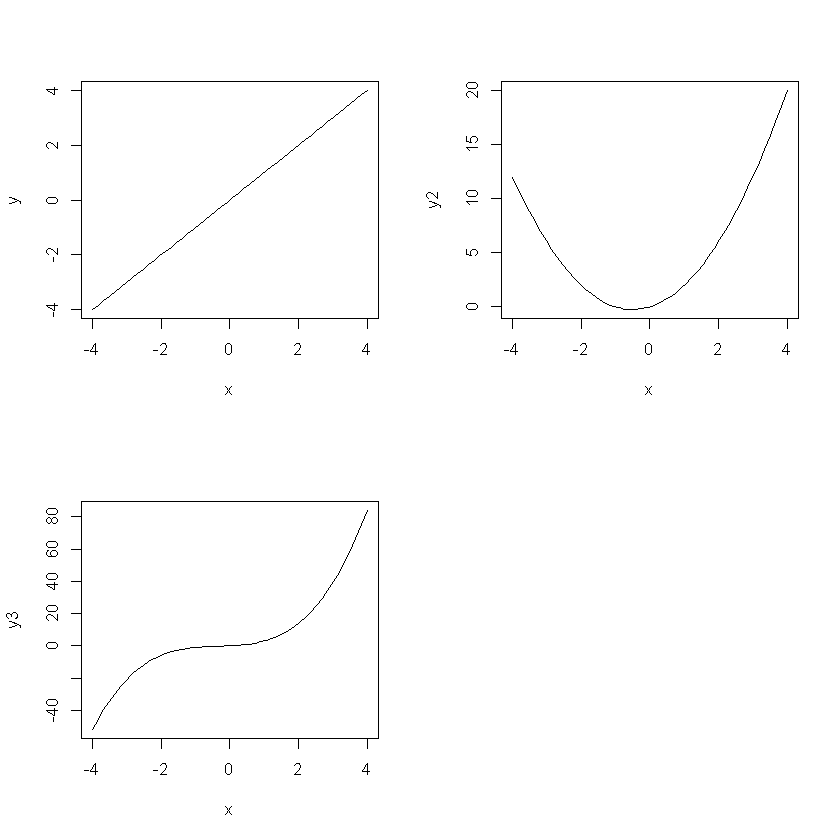

In [42]:
x <- seq(-4,4,length=50)
y <- x
y2 <- x + x^2
y3 <- x + x^2 + x^3

par(mfrow=c(2,2))
plot(x,y,type="l")
plot(x,y2,type="l")
plot(x,y3,type="l")

#### Fitting a Polynomial Transformation


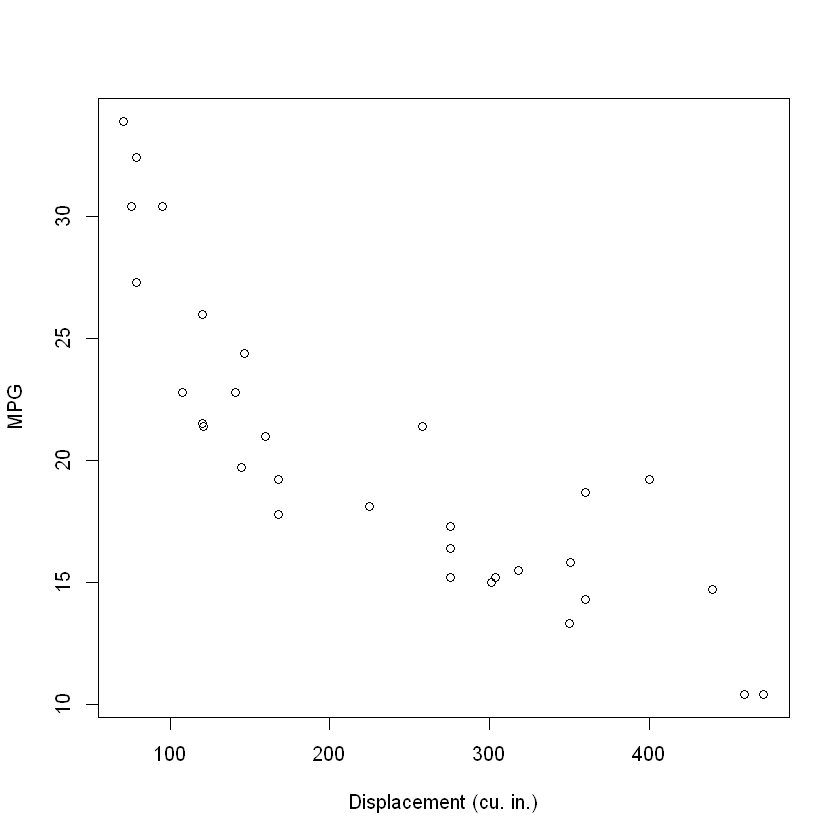

In [43]:
plot(mtcars$disp,mtcars$mpg,xlab="Displacement (cu. in.)",ylab="MPG")

In [44]:
car.order1 <- lm(mpg~disp,data=mtcars)
summary(car.order1)


Call:
lm(formula = mpg ~ disp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8922 -2.2022 -0.9631  1.6272  7.2305 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.599855   1.229720  24.070  < 2e-16 ***
disp        -0.041215   0.004712  -8.747 9.38e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.251 on 30 degrees of freedom
Multiple R-squared:  0.7183,	Adjusted R-squared:  0.709 
F-statistic: 76.51 on 1 and 30 DF,  p-value: 9.38e-10


In [45]:
car.order2 <- lm(mpg~disp+I(disp^2),data=mtcars)
summary(car.order2)


Call:
lm(formula = mpg ~ disp + I(disp^2), data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9112 -1.5269 -0.3124  1.3489  5.3946 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.583e+01  2.209e+00  16.221 4.39e-16 ***
disp        -1.053e-01  2.028e-02  -5.192 1.49e-05 ***
I(disp^2)    1.255e-04  3.891e-05   3.226   0.0031 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.837 on 29 degrees of freedom
Multiple R-squared:  0.7927,	Adjusted R-squared:  0.7784 
F-statistic: 55.46 on 2 and 29 DF,  p-value: 1.229e-10


In [46]:
car.order3 <- lm(mpg~disp+I(disp^2)+I(disp^3),data=mtcars)
summary(car.order3)


Call:
lm(formula = mpg ~ disp + I(disp^2) + I(disp^3), data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0896 -1.5653 -0.3619  1.4368  4.7617 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.070e+01  3.809e+00  13.310 1.25e-13 ***
disp        -3.372e-01  5.526e-02  -6.102 1.39e-06 ***
I(disp^2)    1.109e-03  2.265e-04   4.897 3.68e-05 ***
I(disp^3)   -1.217e-06  2.776e-07  -4.382  0.00015 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.224 on 28 degrees of freedom
Multiple R-squared:  0.8771,	Adjusted R-squared:  0.8639 
F-statistic: 66.58 on 3 and 28 DF,  p-value: 7.347e-13


#### Plotting the Polynomial Fit

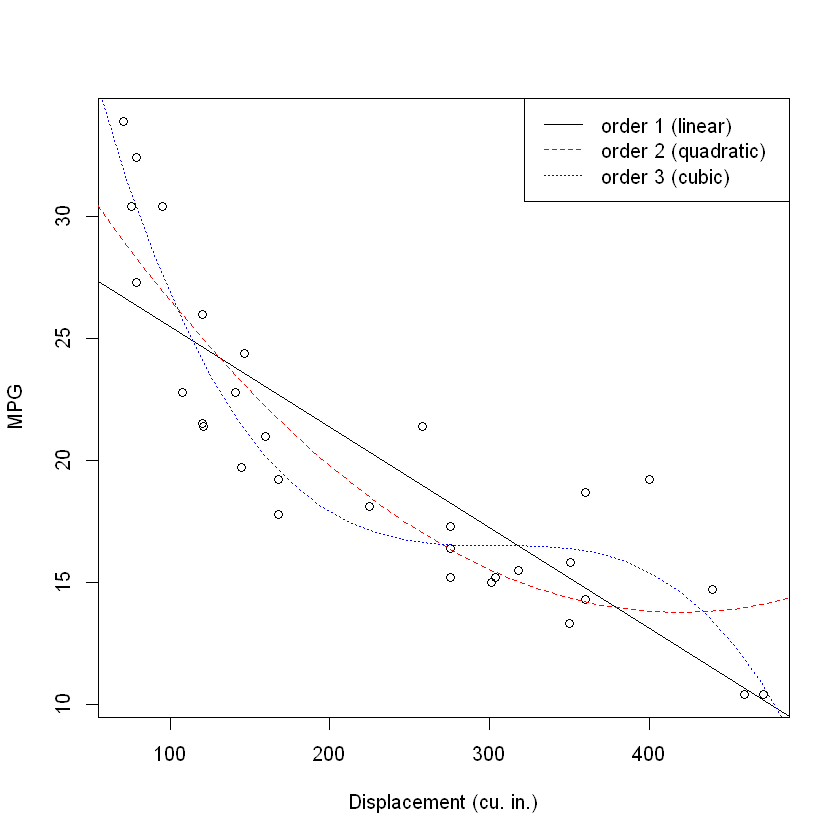

In [54]:
plot(mtcars$disp,mtcars$mpg,xlab="Displacement (cu. in.)",ylab="MPG", )
abline(car.order1)

disp.seq <- seq(min(mtcars$disp)-50,max(mtcars$disp)+50,length=30)
car.order2.pred <- predict(car.order2,newdata=data.frame(disp=disp.seq))
lines(disp.seq,car.order2.pred,lty=2, col = "red")

car.order3.pred <- predict(car.order3,newdata=data.frame(disp=disp.seq))
lines(disp.seq,car.order3.pred,lty=3, col = "blue")
legend("topright",lty=1:3, legend=c("order 1 (linear)","order 2 (quadratic)","order 3 (cubic)"), col = c("black", "red", "blue"))

### 21.4.2 Logarithmic

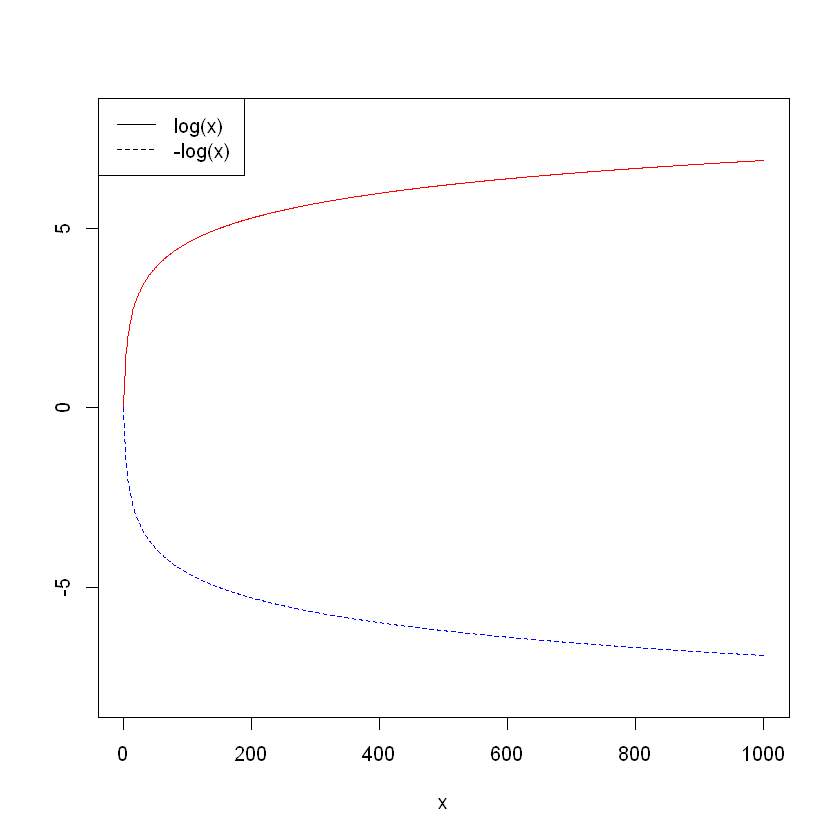

In [56]:
plot(1:1000,log(1:1000),type="l",xlab="x",ylab="",ylim=c(-8,8), col = "red")
lines(1:1000,-log(1:1000),lty=2, col = "blue")
legend("topleft",legend=c("log(x)","-log(x)"),lty=c(1,2))

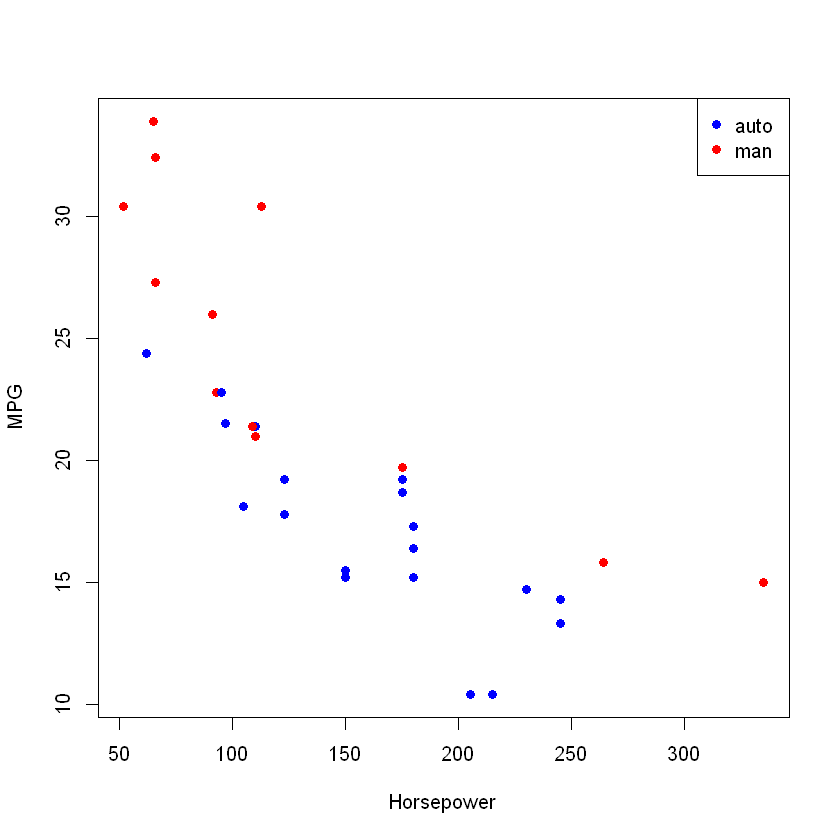

In [58]:
plot(mtcars$hp,mtcars$mpg,pch=19,col=c("blue","red")[factor(mtcars$am)], xlab="Horsepower",ylab="MPG")
legend("topright",legend=c("auto","man"),col=c("blue","red"),pch=19)

In [59]:
car.log <- lm(mpg~log(hp)+am,data=mtcars)
summary(car.log)


Call:
lm(formula = mpg ~ log(hp) + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9084 -1.7692 -0.1432  1.4032  6.3865 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  63.4842     5.2697  12.047 8.24e-13 ***
log(hp)      -9.2383     1.0439  -8.850 9.78e-10 ***
am            4.2025     0.9942   4.227 0.000215 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.592 on 29 degrees of freedom
Multiple R-squared:  0.827,	Adjusted R-squared:  0.8151 
F-statistic: 69.31 on 2 and 29 DF,  p-value: 8.949e-12


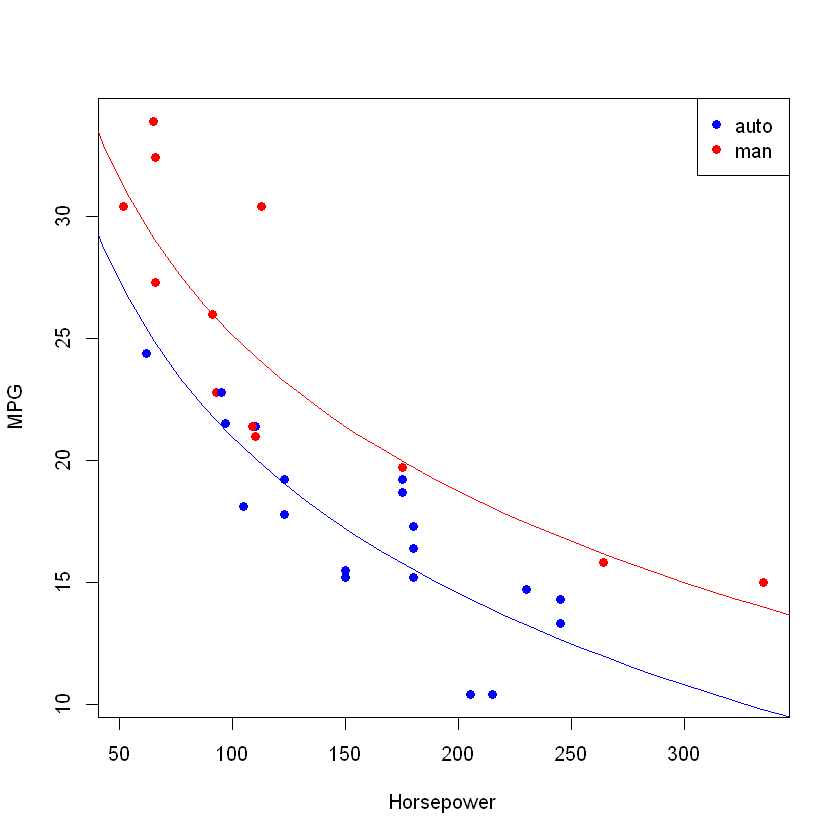

In [63]:
hp.seq <- seq(min(mtcars$hp)-20,max(mtcars$hp)+20,length=30)
n <- length(hp.seq)
car.log.pred <- predict(car.log,newdata=data.frame(hp=rep(hp.seq,2), am=rep(c(0,1),each=n)))

plot(mtcars$hp,mtcars$mpg,pch=19,col=c("blue","red")[factor(mtcars$am)], xlab="Horsepower",ylab="MPG")
legend("topright",legend=c("auto","man"),col=c("blue","red"),pch=19)

lines(hp.seq,car.log.pred[1:n], col = "blue")
lines(hp.seq,car.log.pred[(n+1):(2*n)],col="red")

## 21.5 Interactive Terms

### 21.5.2 One Categorical, One Continuous

In [86]:
library(faraway)
dia.fit <- lm(chol~age+frame+age:frame,data=diabetes)
summary(dia.fit)


Call:
lm(formula = chol ~ age + frame + age:frame, data = diabetes)

Residuals:
    Min      1Q  Median      3Q     Max 
-131.90  -26.24   -5.33   22.17  226.11 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     155.9636    12.0697  12.922  < 2e-16 ***
age               0.9852     0.2687   3.667  0.00028 ***
framemedium      28.6051    15.5503   1.840  0.06661 .  
framelarge       44.9474    18.9842   2.368  0.01840 *  
age:framemedium  -0.3514     0.3370  -1.043  0.29768    
age:framelarge   -0.8511     0.3779  -2.252  0.02490 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42.34 on 384 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.07891,	Adjusted R-squared:  0.06692 
F-statistic:  6.58 on 5 and 384 DF,  p-value: 6.849e-06


“Mean total cholesterol” = 155.9636 + 0.9852 × “age” + 28.6051 × “medium frame” + 44.9474 × “large frame” − 0.3514 × “age : medium frame” − 0.8511 × “age : large frame”

In [87]:
dia.coef <- coef(dia.fit)
dia.coef

(Intercept)             age     framemedium      framelarge age:framemedium 
    155.9635868       0.9852028      28.6051035      44.9474105      -0.3513906 
 age:framelarge 
     -0.8510549

In [88]:
dia.small <- c(dia.coef[1],dia.coef[2])
dia.medium <- c(dia.coef[1]+dia.coef[3],dia.coef[2]+dia.coef[5])
dia.large <- c(dia.coef[1]+dia.coef[4],dia.coef[2]+dia.coef[6])

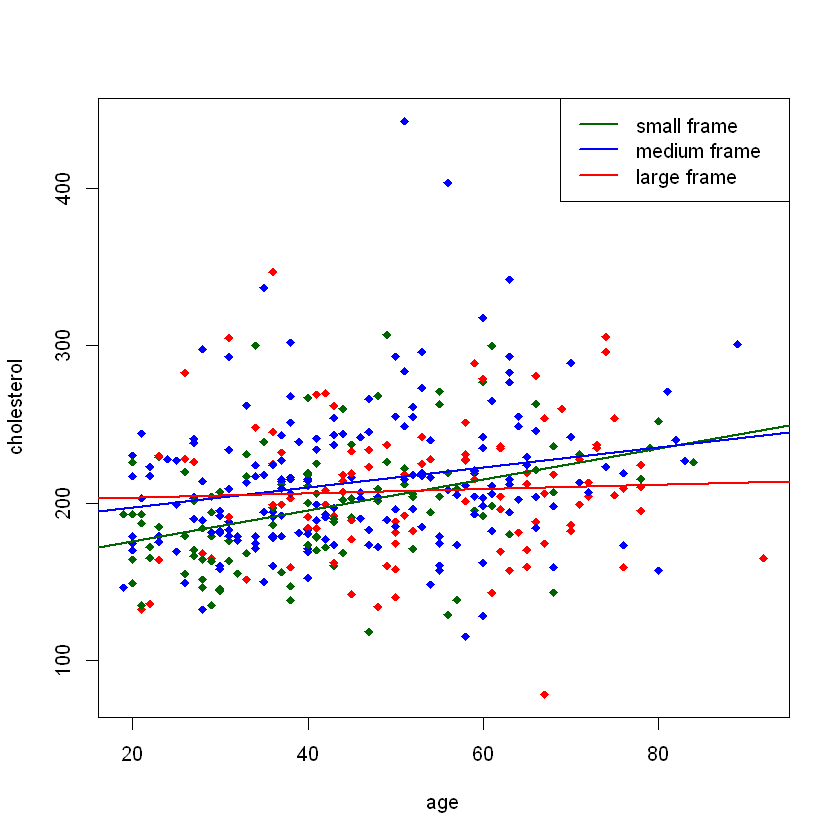

In [99]:
cols <- c("darkgreen","blue","red")
plot(diabetes$chol~diabetes$age,col=cols[diabetes$frame], cex= 1.0 ,xlab="age",ylab="cholesterol", pch = 18)

abline(coef=dia.small,  lwd=2, col = "darkgreen")
abline(coef=dia.medium, lwd=2, col="blue")
abline(coef=dia.large,  lwd=2, col="red")

legend("topright",legend=c("small frame","medium frame","large frame"), lty=1,lwd=2,col=cols)

### 21.5.3 Two Categorical

In [101]:
warp.fit <- lm(breaks~wool*tension,data=warpbreaks)
summary(warp.fit)


Call:
lm(formula = breaks ~ wool * tension, data = warpbreaks)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.5556  -6.8889  -0.6667   7.1944  25.4444 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      44.556      3.647  12.218 2.43e-16 ***
woolB           -16.333      5.157  -3.167 0.002677 ** 
tensionM        -20.556      5.157  -3.986 0.000228 ***
tensionH        -20.000      5.157  -3.878 0.000320 ***
woolB:tensionM   21.111      7.294   2.895 0.005698 ** 
woolB:tensionH   10.556      7.294   1.447 0.154327    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.94 on 48 degrees of freedom
Multiple R-squared:  0.3778,	Adjusted R-squared:  0.3129 
F-statistic: 5.828 on 5 and 48 DF,  p-value: 0.0002772


In [102]:
nd <- data.frame(wool=c("A","A","B","B"),tension=c("L","H","L","M"))
predict(warp.fit,newdata=nd,interval="confidence",level=0.9)

,fit,lwr,upr
1,44.55556,38.43912,50.67199
2,24.55556,18.43912,30.67199
3,28.22222,22.10579,34.33866
4,28.77778,22.66134,34.89421


### 21.5.4 Two Continuous


In [103]:
car.fit <- lm(mpg~hp*wt,data=mtcars)
summary(car.fit)


Call:
lm(formula = mpg ~ hp * wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0632 -1.6491 -0.7362  1.4211  4.5513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.80842    3.60516  13.816 5.01e-14 ***
hp          -0.12010    0.02470  -4.863 4.04e-05 ***
wt          -8.21662    1.26971  -6.471 5.20e-07 ***
hp:wt        0.02785    0.00742   3.753 0.000811 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.153 on 28 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8724 
F-statistic: 71.66 on 3 and 28 DF,  p-value: 2.981e-13


### 21.5.5 Higher-Order Interactions

In [106]:
library(boot)
nuc.fit <- lm(cost~cap+cum.n*ne*ct,data=nuclear)
summary(nuc.fit)


Call:
lm(formula = cost ~ cap + cum.n * ne * ct, data = nuclear)

Residuals:
     Min       1Q   Median       3Q      Max 
-162.475  -50.368   -8.833   43.370  213.131 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  138.0336    99.9599   1.381 0.180585    
cap            0.5085     0.1127   4.513 0.000157 ***
cum.n        -24.2433     6.7874  -3.572 0.001618 ** 
ne          -260.1036   164.7650  -1.579 0.128076    
ct          -187.4904    76.6316  -2.447 0.022480 *  
cum.n:ne      44.0196    12.2880   3.582 0.001577 ** 
cum.n:ct      35.1687     8.0660   4.360 0.000229 ***
ne:ct        524.1194   200.9567   2.608 0.015721 *  
cum.n:ne:ct  -64.4444    18.0213  -3.576 0.001601 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 107.3 on 23 degrees of freedom
Multiple R-squared:  0.705,	Adjusted R-squared:  0.6024 
F-statistic: 6.872 on 8 and 23 DF,  p-value: 0.0001264
